In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns

In [2]:
#from sklearn.datasets import load_boston
boston = datasets.load_boston() 
## Price and associated features
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
## only price 
df_y = pd.DataFrame(boston.target, columns = ['price'])

In [3]:
### count of the price values 
df_y.value_counts()

price
50.0     16
25.0      8
22.0      7
23.1      7
21.7      7
         ..
25.3      1
25.2      1
25.1      1
6.3       1
7.4       1
Length: 229, dtype: int64

In [4]:
df_x.value_counts()

CRIM      ZN    INDUS  CHAS  NOX    RM     AGE    DIS      RAD   TAX    PTRATIO  B       LSTAT
0.00632   18.0  2.31   0.0   0.538  6.575  65.2   4.0900   1.0   296.0  15.3     396.90  4.98     1
1.00245   0.0   8.14   0.0   0.538  6.674  87.3   4.2390   4.0   307.0  21.0     380.23  11.98    1
1.38799   0.0   8.14   0.0   0.538  5.950  82.0   3.9900   4.0   307.0  21.0     232.60  27.71    1
1.35472   0.0   8.14   0.0   0.538  6.072  100.0  4.1750   4.0   307.0  21.0     376.73  13.04    1
1.34284   0.0   19.58  0.0   0.605  6.066  100.0  1.7573   5.0   403.0  14.7     353.89  6.43     1
                                                                                                 ..
0.11027   25.0  5.13   0.0   0.453  6.456  67.8   7.2255   8.0   284.0  19.7     396.90  6.73     1
0.10959   0.0   11.93  0.0   0.573  6.794  89.3   2.3889   1.0   273.0  21.0     393.45  6.48     1
0.10793   0.0   8.56   0.0   0.520  6.195  54.4   2.7778   5.0   384.0  20.9     393.49  13.00    1
0.106

In [5]:
## setting the x and y values for our analyses 
X = df_x 
y = df_y

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [7]:
### scaling the dataset to units of variance and on a standard normal distribution so it can be used for the Linear Regression later on
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [8]:
### PCA for the 13 features and not the price set hence X train is called 
from sklearn.decomposition import PCA

pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

In [9]:
#float type array which contains variance ratios for each principal component.
explained_variance = pca.explained_variance_ratio_ 
explained_variance

array([0.47141676, 0.10796713, 0.09762974, 0.06960265, 0.06250519,
       0.05146177, 0.04131275, 0.02909632, 0.0223605 , 0.01562077,
       0.01396296, 0.01216231, 0.00490115])

Text(0.5, 1.0, 'variance')

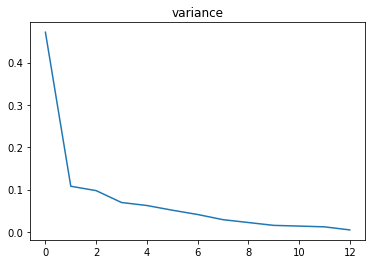

In [10]:
## The changes in the curve regarding variance-- as seen with the variance, there is a steep curve (0.4-0.1) 
pca = {'PC1','PC2','PC3','PC4', 'PC5', 'PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'}
plt.plot(explained_variance)
plt.title("variance")

In [11]:
### running a PCA with a 0.95 threshold  or retaining atleast 95% of the information 
from sklearn.decomposition import PCA

pca = PCA(0.95)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test)  

In [12]:
## Running a Linear regression with the PCA data 
from sklearn.linear_model import LinearRegression  
linear_model = LinearRegression()  
linear_model.fit(X_train, y_train)

LinearRegression()

In [13]:
## the y value when x=0
print(linear_model.intercept_)

[22.61188119]


In [14]:
### the values or three coefficients based on 10 principle components identified through the PCA. The need to retain 95% of the information has resulted in more variables being identified through the PCA 
print(linear_model.coef_) 

[[-2.4629899   1.95254089  3.66013002 -0.57705985 -2.02273292 -0.13200149
  -0.34601445  0.97399857  0.12990453]]


In [15]:
### almost 95% of the variance in the data can be explained by the model (r2)
linear_model.score(X_train, y_train)

0.7469282833918129

In [16]:
y_pred = (linear_model.predict(X_test))

In [17]:
np.mean(np.abs(y_pred-y_test))

price    4.106623
dtype: float64

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.106622938608525
Mean Squared Error: 39.710071009579316
Root Mean Squared Error: 6.301592735934251


In [19]:
### accounts for the variables that have a corelation in this model 74.1% for 10 factors in this case. 
adjusted_r_squared = 1 - (1-linear_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjusted_r_squared

0.7411474573779204

In [ ]:
## The r2 value with a PCA threshold of 0.75 is 0.699 and the adjusted r2 value is 0.697
## The r2 value with a PCA threshold of 0.95 is 0.747 and the adjusted r2 value is 0.741
####### The adjusted r2 value reduces by almost 0.5%. 
## the model with a pca threshold of 0.95 is a better fit since it accounts for almost 75% of the variance compared to appx 70%. 
## However it is interesting to note that the change in the r2 value only increases by appx 5% by adding 7 factors (10 vs 3) as identified with the pca. 
